## Importação dos módulos necessários para análise e visualização

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# melhorar os gráficos do pyplot
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (14.562,9)

# Colocar o tema padão do seaborn
sns.set_theme()

# deixar o número de casas depois do ponto flutuante fixo em 2 casas
pd.options.display.float_format = "{:.2f}".format



## Carregando os dados de doses por ano e fazendo um tratamento preliminar

In [2]:
doses_por_ano = pd.read_csv('arquivos para desafio parte 2/doses calculo/imuno_por_ano.csv', 
                 encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skiprows=3, skipfooter=20)
doses_por_ano

<ipython-input-2-04ae3f5d88e6>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  doses_por_ano = pd.read_csv('arquivos para desafio parte 2/doses calculo/imuno_por_ano.csv',


,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,1994,1442773,-,-,-,144614,-,-,951598,-,...,-,1058103,-,-,-,1165982,-,-,-,4849219
1,1995,3118425,-,-,-,316010,-,-,2341912,-,...,-,2423578,-,-,-,2613843,4,-,-,10958504
2,1996,3250708,-,-,-,514762,-,-,2522390,-,...,-,2441053,-,-,-,2508162,452,-,-,11413755
3,1997,3709941,-,-,-,183338,-,-,2827700,-,...,-,2486541,-,-,-,3440381,1042,-,-,12897208
4,1998,3568228,-,-,-,403949,-,-,3046858,-,...,-,2972400,-,-,-,3045492,26714,-,-,13654790
5,1999,3813081,-,-,-,2714650,-,-,3221283,-,...,-,3071205,-,-,-,3228898,165527,-,-,19781941
6,2000,3772892,-,-,-,3075124,-,-,3424919,-,...,-,3197754,-,-,-,3557231,2966232,-,-,23851212
7,2001,3643993,-,-,-,2973497,-,-,3327803,-,...,-,3153708,-,-,-,3360925,3012958,-,-,23720109
8,2002,3542563,-,-,-,2938416,-,-,3212628,-,...,-,1435465,-,-,-,3084612,1252217,-,-,19843745
9,2003,3465048,-,-,-,2938883,-,-,3209756,-,...,-,44906,-,-,-,129800,55009,-,-,14577689


In [3]:
doses_por_ano.set_index('Ano', inplace=True)
doses_por_ano.index = pd.to_datetime(doses_por_ano.index, format='%Y')

In [4]:
doses_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 1994-01-01 to 2019-01-01
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   072 BCG                                        26 non-null     int64 
 1   099 Hepatite B  em crianças até 30 dias        26 non-null     object
 2   061 Rotavírus Humano                           26 non-null     object
 3   053 Meningococo C                              26 non-null     object
 4   073 Hepatite B                                 26 non-null     int64 
 5   080 Penta                                      26 non-null     object
 6   012 Pneumocócica                               26 non-null     object
 7   074 Poliomielite                               26 non-null     int64 
 8   100 Poliomielite 4 anos                        26 non-null     object
 9   006 Febre Amarela                              

### De acordo com a legenda, os traços significam Dado numérico igual a 0 não resultante de arredondamento

In [5]:
for coluna in doses_por_ano.columns:
    doses_por_ano[coluna] = pd.to_numeric(doses_por_ano[coluna], errors='coerce')
doses_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 1994-01-01 to 2019-01-01
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   072 BCG                                        26 non-null     int64  
 1   099 Hepatite B  em crianças até 30 dias        6 non-null      float64
 2   061 Rotavírus Humano                           14 non-null     float64
 3   053 Meningococo C                              10 non-null     float64
 4   073 Hepatite B                                 26 non-null     int64  
 5   080 Penta                                      8 non-null      float64
 6   012 Pneumocócica                               10 non-null     float64
 7   074 Poliomielite                               26 non-null     int64  
 8   100 Poliomielite 4 anos                        3 non-null      float64
 9   006 Febre Amarela                   

In [6]:
doses_por_ano

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,...,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
Ano,,,,,,,,,,,,,,,,,,,,,
1994-01-01,1442773,nan,nan,nan,144614,nan,nan,951598,nan,86149,...,nan,1058103,nan,nan,nan,1165982.00,nan,nan,nan,4849219
1995-01-01,3118425,nan,nan,nan,316010,nan,nan,2341912,nan,144732,...,nan,2423578,nan,nan,nan,2613843.00,4.00,nan,nan,10958504
1996-01-01,3250708,nan,nan,nan,514762,nan,nan,2522390,nan,176228,...,nan,2441053,nan,nan,nan,2508162.00,452.00,nan,nan,11413755
1997-01-01,3709941,nan,nan,nan,183338,nan,nan,2827700,nan,248265,...,nan,2486541,nan,nan,nan,3440381.00,1042.00,nan,nan,12897208
1998-01-01,3568228,nan,nan,nan,403949,nan,nan,3046858,nan,591149,...,nan,2972400,nan,nan,nan,3045492.00,26714.00,nan,nan,13654790
1999-01-01,3813081,nan,nan,nan,2714650,nan,nan,3221283,nan,944728,...,nan,3071205,nan,nan,nan,3228898.00,165527.00,nan,nan,19781941
2000-01-01,3772892,nan,nan,nan,3075124,nan,nan,3424919,nan,1253896,...,nan,3197754,nan,nan,nan,3557231.00,2966232.00,nan,nan,23851212
2001-01-01,3643993,nan,nan,nan,2973497,nan,nan,3327803,nan,1302294,...,nan,3153708,nan,nan,nan,3360925.00,3012958.00,nan,nan,23720109
2002-01-01,3542563,nan,nan,nan,2938416,nan,nan,3212628,nan,1243045,...,nan,1435465,nan,nan,nan,3084612.00,1252217.00,nan,nan,19843745


In [7]:
doses_por_ano.drop('Total', axis=1, inplace=True)
doses_por_ano

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,...,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
Ano,,,,,,,,,,,,,,,,,,,,,
1994-01-01,1442773,nan,nan,nan,144614,nan,nan,951598,nan,86149,...,nan,nan,1058103,nan,nan,nan,1165982.00,nan,nan,nan
1995-01-01,3118425,nan,nan,nan,316010,nan,nan,2341912,nan,144732,...,nan,nan,2423578,nan,nan,nan,2613843.00,4.00,nan,nan
1996-01-01,3250708,nan,nan,nan,514762,nan,nan,2522390,nan,176228,...,nan,nan,2441053,nan,nan,nan,2508162.00,452.00,nan,nan
1997-01-01,3709941,nan,nan,nan,183338,nan,nan,2827700,nan,248265,...,nan,nan,2486541,nan,nan,nan,3440381.00,1042.00,nan,nan
1998-01-01,3568228,nan,nan,nan,403949,nan,nan,3046858,nan,591149,...,nan,nan,2972400,nan,nan,nan,3045492.00,26714.00,nan,nan
1999-01-01,3813081,nan,nan,nan,2714650,nan,nan,3221283,nan,944728,...,nan,nan,3071205,nan,nan,nan,3228898.00,165527.00,nan,nan
2000-01-01,3772892,nan,nan,nan,3075124,nan,nan,3424919,nan,1253896,...,nan,nan,3197754,nan,nan,nan,3557231.00,2966232.00,nan,nan
2001-01-01,3643993,nan,nan,nan,2973497,nan,nan,3327803,nan,1302294,...,nan,nan,3153708,nan,nan,nan,3360925.00,3012958.00,nan,nan
2002-01-01,3542563,nan,nan,nan,2938416,nan,nan,3212628,nan,1243045,...,nan,nan,1435465,nan,nan,nan,3084612.00,1252217.00,nan,nan


---

### Ter uma visão geral dos dados com um resumo estatístico

In [8]:
doses_por_ano.describe()

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,...,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
count,26.00,6.00,14.00,10.00,26.00,8.00,10.00,26.00,3.00,26.00,...,7.00,7.00,26.00,7.00,3.00,7.00,10.00,9.00,7.00,7.00
mean,3141701.54,2344656.17,2385141.50,2439112.60,2329377.04,2268838.38,2357512.90,2796231.15,4616.33,1114132.54,...,2168608.71,1556300.86,2549219.96,128662.29,5331226.33,2118580.29,2613532.60,831128.33,1178626.29,988988.00
std,560159.82,462150.23,419120.12,752536.58,1040607.98,766270.48,687501.67,543634.80,2472.93,457669.73,...,392259.98,813432.29,746642.47,38561.24,1028569.41,521901.90,1115320.24,1287374.60,229211.87,607353.10
min,1442773.00,1412844.00,1369812.00,639104.00,144614.00,716708.00,691929.00,951598.00,1854.00,86149.00,...,1414126.00,656702.00,44906.00,53753.00,4171330.00,1131487.00,129800.00,4.00,877068.00,81614.00
25%,3054856.25,2443697.00,2384658.50,2520773.00,2589313.50,2227999.75,2400010.50,2586936.50,3612.50,1117095.00,...,2094894.00,961362.00,2487918.25,115890.50,4930645.50,1919677.50,2534582.25,1042.00,983672.50,638937.00
50%,3163684.50,2505693.50,2497353.00,2749308.00,2816632.50,2575345.00,2690572.50,2926378.50,5371.00,1302442.50,...,2275578.00,1097158.00,2817224.00,141724.00,5689961.00,2211157.00,3065052.00,55009.00,1263527.00,1197981.00
75%,3470448.00,2562776.00,2626761.50,2836808.75,2936288.50,2764740.50,2726102.75,3138769.25,5997.50,1380393.25,...,2301469.00,2298850.50,2981872.50,153917.00,5911174.50,2498900.00,3327918.25,1252217.00,1332222.50,1282822.00
max,3813081.00,2638871.00,2767095.00,3043101.00,3130964.00,2794548.00,2827520.00,3424919.00,6624.00,1648260.00,...,2697831.00,2619821.00,3197754.00,165544.00,6132388.00,2650263.00,3557231.00,3012958.00,1477999.00,1799803.00


### Por quantos anos a vacina foi ministrada

In [9]:
doses_por_ano.describe().iloc[0]

072 BCG                                         26.00
099 Hepatite B  em crianças até 30 dias          6.00
061 Rotavírus Humano                            14.00
053 Meningococo C                               10.00
073 Hepatite B                                  26.00
080 Penta                                        8.00
012 Pneumocócica                                10.00
074 Poliomielite                                26.00
100 Poliomielite 4 anos                          3.00
006 Febre Amarela                               26.00
096 Hepatite A                                   6.00
091 Pneumocócica(1º ref)                         7.00
092 Meningococo C (1º ref)                       7.00
093 Poliomielite(1º ref)                         7.00
021 Tríplice Viral  D1                          21.00
098 Tríplice Viral  D2                           7.00
097 Tetra Viral(SRC+VZ)                          7.00
075 DTP                                         26.00
102 DTP REF (4 e 6 anos)    

In [10]:
# em ordem crescente
quantidade_anos_vacinacao_por_imuno = doses_por_ano.describe().iloc[0].sort_values()
quantidade_anos_vacinacao_por_imuno

103 Dupla Adulto (dt)                            3.00
100 Poliomielite 4 anos                          3.00
099 Hepatite B  em crianças até 30 dias          6.00
096 Hepatite A                                   6.00
092 Meningococo C (1º ref)                       7.00
095 Tríplice Bacteriana(DTP)(1º ref)             7.00
102 DTP REF (4 e 6 anos)                         7.00
097 Tetra Viral(SRC+VZ)                          7.00
098 Tríplice Viral  D2                           7.00
093 Poliomielite(1º ref)                         7.00
094 Dupla adulto e tríplice acelular gestante    7.00
003 dTpa gestante                                7.00
091 Pneumocócica(1º ref)                         7.00
080 Penta                                        8.00
009 Haemophilus influenzae b                     9.00
012 Pneumocócica                                10.00
053 Meningococo C                               10.00
018 Sarampo                                     10.00
061 Rotavírus Humano        

---

### Observação de como a as doses estão sendo aplicadas por ano, somente as que têm os 26 anos

In [11]:
vacinas_com_hitorico = doses_por_ano.dropna(axis=1).copy()
vacinas_com_hitorico

,072 BCG,073 Hepatite B,074 Poliomielite,006 Febre Amarela,075 DTP
Ano,,,,,
1994-01-01,1442773,144614,951598,86149,1058103
1995-01-01,3118425,316010,2341912,144732,2423578
1996-01-01,3250708,514762,2522390,176228,2441053
1997-01-01,3709941,183338,2827700,248265,2486541
1998-01-01,3568228,403949,3046858,591149,2972400
1999-01-01,3813081,2714650,3221283,944728,3071205
2000-01-01,3772892,3075124,3424919,1253896,3197754
2001-01-01,3643993,2973497,3327803,1302294,3153708
2002-01-01,3542563,2938416,3212628,1243045,1435465


In [12]:
vacinas_com_hitorico = vacinas_com_hitorico.reset_index().melt(id_vars=["Ano"], value_vars=vacinas_com_hitorico.columns)
vacinas_com_hitorico.columns = ['ano', 'imuno', 'doses']
vacinas_com_hitorico

,ano,imuno,doses
0,1994-01-01,072 BCG,1442773
1,1995-01-01,072 BCG,3118425
2,1996-01-01,072 BCG,3250708
3,1997-01-01,072 BCG,3709941
4,1998-01-01,072 BCG,3568228
...,...,...,...
125,2015-01-01,075 DTP,2811624
126,2016-01-01,075 DTP,2664547
127,2017-01-01,075 DTP,2500636
128,2018-01-01,075 DTP,2492050


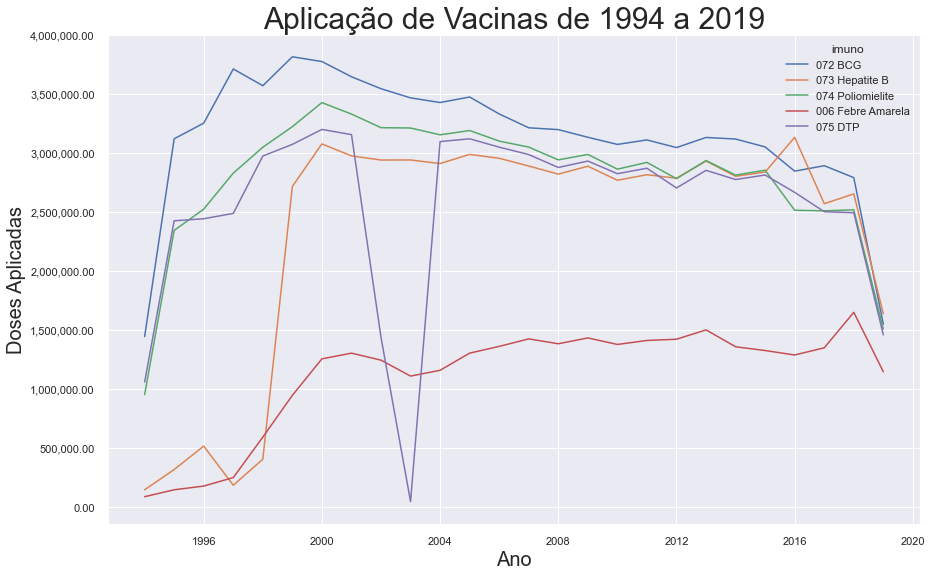

In [13]:
ax = sns.lineplot(x='ano', y='doses', hue="imuno", data=vacinas_com_hitorico)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

ax.set_title("Aplicação de Vacinas de 1994 a 2019", fontsize=30)
ax.set_ylabel('Doses Aplicadas', fontsize=20)
ax.set_xlabel('Ano', fontsize=20)

plt.show()

## Observações a partir do gráfico:

### 1. Na tabela não tinha observado esse valor discrepante no número de doses da DTP no ano de 2003, mas no gráfico foi possível ver essa deformação e imaginar que tenha sido um erro, uma vez que observamos que no ano anterior e no posteiror os valores estão dentro da mesma ordem de grandeza e em uma pesquisa rápida não foi noticiada nenhum problema no ano de 2003 com vacinação de DTP.

### 2 . Observamos que o ano de 2019 ainda não foi lançado, inclusive, essa informação está presente nas observações do site do Tabnet. No site informa que a ultima atualização é 04/09/2019 

### 3. Podemos observar uma queda no número de doses aplicadas no decorrer dos anos

## Para comprovar ou não se menos pessoas estão sendo vacinadas ou o número está acompanhando uma diminuição no crescimento da população, vamos ver a cobertura vacinal que é um número relativo que usa a população como parâmetro

In [14]:
cobertura_por_ano = pd.read_csv('arquivos para desafio parte 2/cobertura vacinal/Coberturas Vacinais por Imuno segundo Ano.csv', 
                 encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skiprows=3, skipfooter=20)
cobertura_por_ano

<ipython-input-14-b4e7d89737c4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  cobertura_por_ano = pd.read_csv('arquivos para desafio parte 2/cobertura vacinal/Coberturas Vacinais por Imuno segundo Ano.csv',


,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,1994,88.29,NaN,NaN,NaN,8.85,nan,nan,58.23,nan,...,nan,nan,64.75,nan,nan,71.35,nan,nan,nan,49.46
1,1995,103.62,NaN,NaN,NaN,10.50,nan,nan,77.82,nan,...,nan,nan,80.53,nan,nan,86.85,0.00,nan,nan,52.02
2,1996,104.19,NaN,NaN,NaN,16.50,nan,nan,80.85,nan,...,nan,nan,78.24,nan,nan,80.39,0.01,nan,nan,52.26
3,1997,117.12,NaN,NaN,NaN,5.79,nan,nan,89.27,nan,...,nan,nan,78.50,nan,nan,108.61,0.03,nan,nan,58.17
4,1998,111.61,NaN,NaN,NaN,12.63,nan,nan,95.30,nan,...,nan,nan,92.97,nan,nan,95.26,0.84,nan,nan,61.01
5,1999,117.28,NaN,-,NaN,83.50,nan,nan,99.08,nan,...,nan,nan,94.46,nan,nan,99.31,5.09,nan,nan,75.94
6,2000,111.74,NaN,-,NaN,91.08,nan,nan,101.44,nan,...,nan,nan,94.71,nan,nan,105.35,87.85,nan,nan,78.53
7,2001,112.60,NaN,-,NaN,91.88,nan,nan,102.83,nan,...,nan,nan,97.45,nan,nan,103.85,93.10,nan,nan,81.18
8,2002,110.28,NaN,-,NaN,91.47,nan,nan,100.01,nan,...,nan,nan,44.69,nan,nan,96.02,38.98,nan,nan,68.59
9,2003,108.47,NaN,-,NaN,92.00,nan,nan,100.48,nan,...,nan,nan,1.41,nan,nan,4.06,1.72,nan,nan,50.68


In [15]:
cobertura_por_ano.set_index('Ano', inplace=True)
cobertura_por_ano.index = pd.to_datetime(doses_por_ano.index, format='%Y')

for coluna in cobertura_por_ano.columns:
    cobertura_por_ano[coluna] = pd.to_numeric(cobertura_por_ano[coluna], errors='coerce')

cobertura_por_ano.drop('Total', axis=1, inplace=True)
cobertura_por_ano

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,...,021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
Ano,,,,,,,,,,,,,,,,,,,,,
1994-01-01,88.29,nan,nan,nan,8.85,nan,nan,58.23,nan,5.27,...,nan,nan,nan,64.75,nan,nan,71.35,nan,nan,nan
1995-01-01,103.62,nan,nan,nan,10.50,nan,nan,77.82,nan,4.81,...,nan,nan,nan,80.53,nan,nan,86.85,0.00,nan,nan
1996-01-01,104.19,nan,nan,nan,16.50,nan,nan,80.85,nan,5.65,...,nan,nan,nan,78.24,nan,nan,80.39,0.01,nan,nan
1997-01-01,117.12,nan,nan,nan,5.79,nan,nan,89.27,nan,7.84,...,nan,nan,nan,78.50,nan,nan,108.61,0.03,nan,nan
1998-01-01,111.61,nan,nan,nan,12.63,nan,nan,95.30,nan,18.49,...,nan,nan,nan,92.97,nan,nan,95.26,0.84,nan,nan
1999-01-01,117.28,nan,nan,nan,83.50,nan,nan,99.08,nan,29.06,...,6692.10,nan,nan,94.46,nan,nan,99.31,5.09,nan,nan
2000-01-01,111.74,nan,nan,nan,91.08,nan,nan,101.44,nan,37.14,...,77.50,nan,nan,94.71,nan,nan,105.35,87.85,nan,nan
2001-01-01,112.60,nan,nan,nan,91.88,nan,nan,102.83,nan,40.24,...,88.43,nan,nan,97.45,nan,nan,103.85,93.10,nan,nan
2002-01-01,110.28,nan,nan,nan,91.47,nan,nan,100.01,nan,38.70,...,96.92,nan,nan,44.69,nan,nan,96.02,38.98,nan,nan


In [16]:
cobertura_por_ano.describe().iloc[0].sort_values()

100 Poliomielite 4 anos                          3.00
102 DTP REF (4 e 6 anos)                         5.00
099 Hepatite B  em crianças até 30 dias          6.00
096 Hepatite A                                   6.00
091 Pneumocócica(1º ref)                         7.00
095 Tríplice Bacteriana(DTP)(1º ref)             7.00
097 Tetra Viral(SRC+VZ)                          7.00
098 Tríplice Viral  D2                           7.00
093 Poliomielite(1º ref)                         7.00
092 Meningococo C (1º ref)                       7.00
094 Dupla adulto e tríplice acelular gestante    7.00
003 dTpa gestante                                7.00
080 Penta                                        8.00
009 Haemophilus influenzae b                     9.00
012 Pneumocócica                                10.00
053 Meningococo C                               10.00
018 Sarampo                                     10.00
061 Rotavírus Humano                            14.00
021 Tríplice Viral  D1      

In [17]:
cobertura_com_hitorico = cobertura_por_ano.dropna(axis=1).copy()
cobertura_com_hitorico

,072 BCG,073 Hepatite B,074 Poliomielite,006 Febre Amarela,075 DTP
Ano,,,,,
1994-01-01,88.29,8.85,58.23,5.27,64.75
1995-01-01,103.62,10.50,77.82,4.81,80.53
1996-01-01,104.19,16.50,80.85,5.65,78.24
1997-01-01,117.12,5.79,89.27,7.84,78.50
1998-01-01,111.61,12.63,95.30,18.49,92.97
1999-01-01,117.28,83.50,99.08,29.06,94.46
2000-01-01,111.74,91.08,101.44,37.14,94.71
2001-01-01,112.60,91.88,102.83,40.24,97.45
2002-01-01,110.28,91.47,100.01,38.70,44.69


In [18]:
cobertura_com_hitorico = cobertura_com_hitorico.reset_index().melt(id_vars=["Ano"], value_vars=cobertura_com_hitorico.columns)
cobertura_com_hitorico.columns = ['ano', 'imuno', 'doses']
cobertura_com_hitorico

,ano,imuno,doses
0,1994-01-01,072 BCG,88.29
1,1995-01-01,072 BCG,103.62
2,1996-01-01,072 BCG,104.19
3,1997-01-01,072 BCG,117.12
4,1998-01-01,072 BCG,111.61
...,...,...,...
125,2015-01-01,075 DTP,96.90
126,2016-01-01,075 DTP,89.53
127,2017-01-01,075 DTP,84.02
128,2018-01-01,075 DTP,87.31


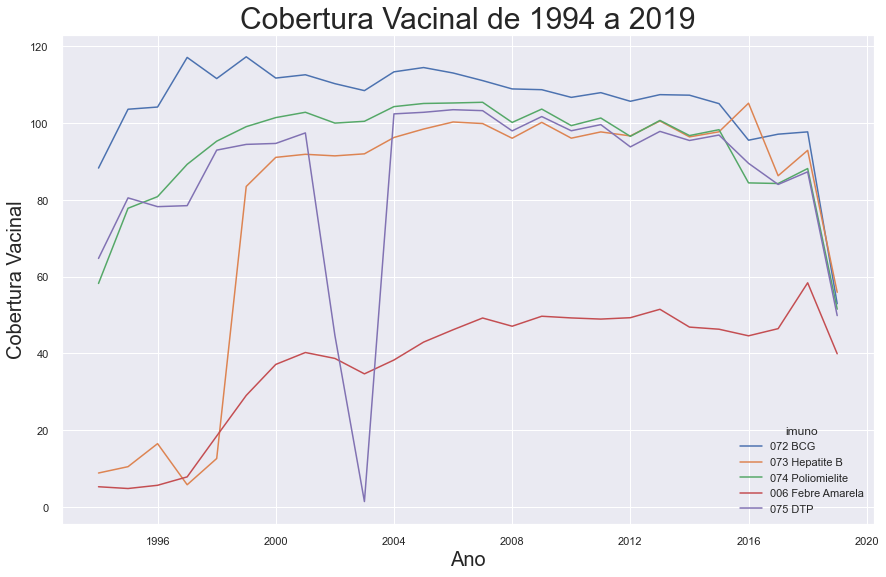

In [19]:
ax = sns.lineplot(x='ano', y='doses', hue="imuno", data=cobertura_com_hitorico)

ax.set_title("Cobertura Vacinal de 1994 a 2019", fontsize=30)
ax.set_ylabel('Cobertura Vacinal', fontsize=20)
ax.set_xlabel('Ano', fontsize=20)

plt.show()

### Podemos observar que na cobertura vacinal também é possível identificar uma queda no decorrer dos anos e o problema com a DTP no ano de 2013

---

## Como os únicos imunos que têm  dados em todo o histórico de 1994 até 2019 são:
### 072 BCG, 006 Febre Amarela, 073 Hepatite B, 074 Poliomielite,  e 075 DTP.
### O que fez levantar a hipótese que as outras vacinas teriam sido implementadas nos anos que aparecem.
### Hipótese confirmada através da Nota Técnica de Imunização (http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)
```
De acordo com a nota técnica de imunizações foram inseridas com o passar do tempo no calendário de vacinação e também com alteração no público alvo.
Justamente os imunos que tiveram alteração de público alvo e sua implementação ou foi em 1994 ou antes são:
BCG, Febre Amarela, Hepatite B,  poliomielite (VOP) e Tríplice Bacteriana (DTP).
```

---

### Vamos identificar vacinas que não são aplicadas desde 1994 até 2019, para ser mais preciso, selecionar aquelas que começaram depois de 1994 e estão até hoje no calendário.
### Conseguindo outras fontes, tentaremos relacionar o início de uma vacina com a redução da doença ou mortalidade.

---

In [20]:
quantidade_anos_vacinacao_por_imuno

103 Dupla Adulto (dt)                            3.00
100 Poliomielite 4 anos                          3.00
099 Hepatite B  em crianças até 30 dias          6.00
096 Hepatite A                                   6.00
092 Meningococo C (1º ref)                       7.00
095 Tríplice Bacteriana(DTP)(1º ref)             7.00
102 DTP REF (4 e 6 anos)                         7.00
097 Tetra Viral(SRC+VZ)                          7.00
098 Tríplice Viral  D2                           7.00
093 Poliomielite(1º ref)                         7.00
094 Dupla adulto e tríplice acelular gestante    7.00
003 dTpa gestante                                7.00
091 Pneumocócica(1º ref)                         7.00
080 Penta                                        8.00
009 Haemophilus influenzae b                     9.00
012 Pneumocócica                                10.00
053 Meningococo C                               10.00
018 Sarampo                                     10.00
061 Rotavírus Humano        

## Vacina que tem o maior histórico que começou depois de 1994

In [21]:
# vacina contra Rubéola, sarampo e caxumba
doses_por_ano['021 Tríplice Viral  D1']

Ano
1994-01-01          nan
1995-01-01          nan
1996-01-01          nan
1997-01-01          nan
1998-01-01          nan
1999-01-01   2622569.00
2000-01-01   2603164.00
2001-01-01   2944931.00
2002-01-01   3134799.00
2003-01-01   3626412.00
2004-01-01   3352861.00
2005-01-01   3231165.00
2006-01-01   3102996.00
2007-01-01   3088679.00
2008-01-01   2929082.00
2009-01-01   2988032.00
2010-01-01   2878184.00
2011-01-01   2948879.00
2012-01-01   2865668.00
2013-01-01   3131123.00
2014-01-01   3276483.00
2015-01-01   2787903.00
2016-01-01   2839666.00
2017-01-01   2703996.00
2018-01-01   2622897.00
2019-01-01   1672026.00
Name: 021 Tríplice Viral  D1, dtype: float64

---

## Vamos usar outras fontes para ver específicamente a vacina Tríplice Viral no Rio de Janeiro

In [22]:
triplice_mun_rj = pd.read_csv("arquivos para desafio parte 2/doses_municipio_rio_1994-2020.csv",  encoding='ISO-8859-1', sep=';', thousands='.', decimal=',')
triplice_mun_rj

,Município,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,330455 RIO DE JANEIRO,179444,83953,99546,93935,95202,105685,108892,108835,149514,...,177501,352184,413442,214732,278194,204002,262684,312699,383213,5007598
1,Total,179444,83953,99546,93935,95202,105685,108892,108835,149514,...,177501,352184,413442,214732,278194,204002,262684,312699,383213,5007598


### Diferentemente do dado obtido anteriormente, no site do Tabnet, quando pesquisado por município de 1994 até 2020, identificamos que há histórico de vacinação de tríplice viral desde 1997

In [23]:
triplice_mun_rj = triplice_mun_rj.T.reset_index()
triplice_mun_rj.columns = ['ano','doses','doses2']
triplice_mun_rj = triplice_mun_rj.loc[1:24].copy()
triplice_mun_rj.drop(columns=['doses2'], inplace=True)
triplice_mun_rj.set_index('ano', inplace=True)
triplice_mun_rj.index = pd.to_datetime(triplice_mun_rj.index, format='%Y')
triplice_mun_rj

,doses
ano,
1997-01-01,179444
1998-01-01,83953
1999-01-01,99546
2000-01-01,93935
2001-01-01,95202
2002-01-01,105685
2003-01-01,108892
2004-01-01,108835
2005-01-01,149514


---

Fonte de casos de rubéola e sarampo município Rio de Janeiro
https://www.data.rio/datasets/casos-de-rub%C3%A9ola-e-sarampo-segundo-%C3%A1reas-de-planejamento-ap-regi%C3%B5es-administrativas-ra-e-bairros-de-resid%C3%AAncia-no-munic%C3%ADpio-do-rio-de-janeiro-entre-1996-2018

### Somente 2 linhas do dataset vão ser necessárias, mais fácil copiar diretamente do excel

In [24]:
casos_notificados_rubeola_e_sarampo = {
    1996 : 103,
    1997 : 1458,
    1998 : 151,
    1999 : 66,
    2000 : 0,
    2001 : 0,
    2002 : 0,
    2003 : 0,
    2004 : 0,
    2005 : 0,
    2006 : 0,
    2007 : 0,
    2008 : 0,
    2009 : 0,
    2010 : 0,
    2011 : 3,
    2012 : 0,
    2013 : 0,
    2014 : 3,
    2015 : 0,
    2016 : 0,
    2017 : 0,
    2018 : 14,
}

casos_notificados_rubeola_e_sarampo = pd.DataFrame(casos_notificados_rubeola_e_sarampo, index=[0])
casos_notificados_rubeola_e_sarampo = casos_notificados_rubeola_e_sarampo.T
casos_notificados_rubeola_e_sarampo.columns = ['notificacoes']
casos_notificados_rubeola_e_sarampo.index = pd.to_datetime(casos_notificados_rubeola_e_sarampo.index, format='%Y')
casos_notificados_rubeola_e_sarampo

,notificacoes
1996-01-01,103
1997-01-01,1458
1998-01-01,151
1999-01-01,66
2000-01-01,0
2001-01-01,0
2002-01-01,0
2003-01-01,0
2004-01-01,0
2005-01-01,0


In [25]:
casos_notificados_rubeola_e_sarampo.rename(index={'index': 'ano'}).reset_index()

,index,notificacoes
0,1996-01-01,103
1,1997-01-01,1458
2,1998-01-01,151
3,1999-01-01,66
4,2000-01-01,0
5,2001-01-01,0
6,2002-01-01,0
7,2003-01-01,0
8,2004-01-01,0
9,2005-01-01,0


In [26]:
doenca_vs_vacina = casos_notificados_rubeola_e_sarampo.join(triplice_mun_rj)
doenca_vs_vacina

,notificacoes,doses
1996-01-01,103,NaN
1997-01-01,1458,179444
1998-01-01,151,83953
1999-01-01,66,99546
2000-01-01,0,93935
2001-01-01,0,95202
2002-01-01,0,105685
2003-01-01,0,108892
2004-01-01,0,108835
2005-01-01,0,149514


In [27]:
doenca_vs_vacina = doenca_vs_vacina.replace(np.nan, 0)
doenca_vs_vacina

,notificacoes,doses
1996-01-01,103,0
1997-01-01,1458,179444
1998-01-01,151,83953
1999-01-01,66,99546
2000-01-01,0,93935
2001-01-01,0,95202
2002-01-01,0,105685
2003-01-01,0,108892
2004-01-01,0,108835
2005-01-01,0,149514


## Podemos comprovar observando o início da tabela que quando não existia a vacina a população era acomedida pelas doenças de Rubéola ou sarampo, contudo depois de 3 anos de campanha de vacinação os casos zeraram.
## Procurando a explicação para os anos que notificaram doença, foi vinculado a casos importados, porém atualmente estão percebendo uma menor aderência à vacinação, o que poderia trazer a doença de volta.

---